___
# PROJETO 1

## Felipe Giorgi Vaz Guimarães
___

## Diferença  da qualidade de vida nos domicílios do Nordeste entre 2009 e 2015

___
## Introdução


O primeiro projeto da DP de Ciencias dos Dados direciona o aluno a comparar um grupo de domicílios entre dois anos da PNAD. Isso permite ao aluno trabalhar com uma alta variedade de assuntos, tendo em vista a diversidade de informações prensentes nos bancos de dados. Eu escolhi trabalhar com as diferenças socioeconomicas do Nordeste entre os anos de 2009 e 2015.

Durante as aulas de história no Ensimo Médio, eu aprendi que o Nordeste demorou mais para se desenvoler economicamente do que os demais estados do Brasil. A partir disso, eu resolvi estudar se o estado do Nordeste evolui entre os anos 2009 e 2015. A pesquisa trará uma serie de tabelas e gráficos que mostrem as evoluções que ocorreram.

___
## Análise e Resultados

In [380]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [381]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Giorgi\Desktop\3° Semestre\DP - Ciência dos Dados\Projeto 1


In [382]:
dados2015 = pd.read_csv('DOM2015.csv',sep=',')
dados2009 = pd.read_csv('DOM2009.csv',sep=',')

In [383]:
#Exclui da coluna de V4621(Renda) os domicílios que tinham como renda NaN e aqueles que tinham como renda 999 999 999 999
dados2015.V4621 = dados2015.V4621[(dados2015.V4621 != 999999999999) & (~dados2015.V4621.isnull())]

In [384]:
#Exclui da coluna de V4621(Renda) os domicílios que tinham como renda NaN e aqueles que tinham como renda 999 999 999 999
dados2009.V4621 = dados2009.V4621[(dados2009.V4621 != 999999999999) & (~dados2009.V4621.isnull())]

In [385]:
dados2015.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2015,11,15,1,1,1,1,1,4,...,270,800,191,110001,1,1,800,4,1,20161104
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104
2,2,2015,11,15,3,1,1,1,1,4,...,270,1150,191,110001,1,1,1150,4,1,20161104
3,3,2015,11,15,4,1,6,4,1,2,...,270,4760,191,110001,1,6,793,4,2,20161104
4,4,2015,11,15,5,1,2,2,1,2,...,271,5800,191,110001,1,2,2900,6,2,20161104


In [386]:
dados2009.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V2136,V2033,V2034,V2035,V2036,V2037,V2038,V2039,V2041,V9992
0,0,2009,11,15,1,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20120710
1,1,2009,11,15,2,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20120710
2,2,2009,11,15,3,1,7,5,1,2,...,2,3,3,3,3,3,3,3,1,20120710
3,3,2009,11,15,4,1,3,3,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
4,4,2009,11,15,5,1,1,1,1,2,...,NaN,3,3,3,1,3,3,3,3,20120710


In [387]:
#Separei apenas os estados do Nordeste no PNAD de 2015
Nordeste2015 = dados2015[(dados2015.UF > 20) & (dados2015.UF < 30)]
Nordeste2015.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
21442,21442,2015,21,18,1,1,1,1,1,2,...,752,1576,527,210019,82,1,1576,4,1,20161104
21443,21443,2015,21,18,2,1,2,2,1,2,...,752,788,527,210019,82,2,394,2,4,20161104
21444,21444,2015,21,18,3,1,5,3,1,2,...,751,2182,527,210019,82,5,436,3,2,20161104
21445,21445,2015,21,18,4,6,NaN,NaN,NaN,NaN,...,NaN,NaN,527,210019,82,NaN,NaN,NaN,NaN,20161104
21446,21446,2015,21,18,5,6,NaN,NaN,NaN,NaN,...,NaN,NaN,527,210019,82,NaN,NaN,NaN,NaN,20161104


In [388]:
#n15 indica o número de domicilíos pesquisados em 2015
n15 = Nordeste2015.shape[0]

In [389]:
#Mostrei que a categoria V0211 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V0211 = Nordeste2015.V0211.astype('category')
Nordeste2015.V0211.cat.categories = ('Sim', 'Não')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [390]:
#Mostrei que a categoria V0212 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V0212 = Nordeste2015.V0212.astype('category')
Nordeste2015.V0212.cat.categories = ('Rede geral de distribuição', 'Poço ou nascente','Outra proveniência')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [391]:
#Mostrei que a categoria V0217 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V0217 = Nordeste2015.V0217.astype('category')
Nordeste2015.V0217.cat.categories = ('Rede coletora de esgoto ou pluvial', 'Fossa séptica ligada a rede','Fossa séptica não ligada','Fossa rudimentar','Vala','Direto para o rio, lago ou mar','Outra forma')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [392]:
#Mostrei que a categoria V0218 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V0218 = Nordeste2015.V0218.astype('category')
Nordeste2015.V0218.cat.categories = ('Coletado diretamente', 'Coletado indiretamente','Queimado ou enterrado na propriedade','Jogado em terreno baldio ou logradouro','Jogado em rio, lago ou mar','Outra destino')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [393]:
#Mostrei que a categoria V0219 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V0219 = Nordeste2015.V0219.astype('category')
Nordeste2015.V0219.cat.categories = ('Elétrica', 'Óleo, querosene ou gás','Outra forma')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [394]:
#Mostrei que a categoria V02322 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V02322 = Nordeste2015.V02322.astype('category')
Nordeste2015.V02322.cat.categories = ('Sim', 'Não')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [395]:
#Mostrei que a categoria V0231 é qualitativa e alterei o nome de suas variáveis
Nordeste2015.V0231 = Nordeste2015.V0231.astype('category')
Nordeste2015.V0231.cat.categories = ('Sim', 'Não')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [396]:
#Separei apenas os estados do Nordeste no PNAD de 2009
Nordeste2009 = dados2009[(dados2009.UF > 20) & (dados2009.UF < 30)]
Nordeste2009.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V2136,V2033,V2034,V2035,V2036,V2037,V2038,V2039,V2041,V9992
18333,18333,2009,21,18,1,1,2,2,1,2,...,NaN,3,3,3,3,3,3,3,3,20120710
18334,18334,2009,21,18,2,1,5,5,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
18335,18335,2009,21,18,3,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20120710
18336,18336,2009,21,18,4,1,2,2,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
18337,18337,2009,21,18,5,1,6,6,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710


In [397]:
#n15 indica o número de domicilíos pesquisados em 2009
n09 = Nordeste2009.shape[0]

In [398]:
#Mostrei que a categoria V0211 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0211 = Nordeste2009.V0211.astype('category')
Nordeste2009.V0211.cat.categories = ('Sim', 'Não')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [399]:
#Mostrei que a categoria V0212 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0212 = Nordeste2009.V0212.astype('category')
Nordeste2009.V0212.cat.categories = ('Rede geral de distribuição', 'Poço ou nascente','Outra proveniência')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [400]:
#Mostrei que a categoria V0217 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0217 = Nordeste2009.V0217.astype('category')
Nordeste2009.V0217.cat.categories = ('Rede coletora de esgoto ou pluvial', 'Fossa séptica ligada a rede','Fossa séptica não ligada','Fossa rudimentar','Vala','Direto para o rio, lago ou mar','Outra forma')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [401]:
#Mostrei que a categoria V0218 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0218 = Nordeste2009.V0218.astype('category')
Nordeste2009.V0218.cat.categories = ('Coletado diretamente', 'Coletado indiretamente','Queimado ou enterrado na propriedade','Jogado em terreno baldio ou logradouro','Jogado em rio, lago ou mar','Outra destino')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [402]:
#Mostrei que a categoria V0219 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0219 = Nordeste2009.V0219.astype('category')
Nordeste2009.V0219.cat.categories = ('Elétrica', 'Óleo, querosene ou gás','Outra forma')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [403]:
#Mostrei que a categoria V0231 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0231 = Nordeste2009.V0231.astype('category')
Nordeste2009.V0231.cat.categories = ('Sim', 'Não')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [404]:
#Mostrei que a categoria V0232 é qualitativa e alterei o nome de suas variáveis
Nordeste2009.V0232 = Nordeste2009.V0232.astype('category')
Nordeste2009.V0232.cat.categories = ('Sim', 'Não')

C:\Users\Felipe Giorgi\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [405]:
print('Número de domicilios estudados em 2009: ')
n09

Número de domicilios estudados em 2009: 


46243

In [406]:
print('Número de domicilios estudados em 2015: ')
n15

Número de domicilios estudados em 2015: 


43434

## <font color='red'>Análise do saneamento báscio do Nordeste</font>

In [407]:
print('Número de casas que tem água canalizada em pelo menos um dos cômodos da casa em 2009: ')
Nordeste2009.V0211.value_counts()

Número de casas que tem água canalizada em pelo menos um dos cômodos da casa em 2009: 


Sim    31471
Não     4965
dtype: int64

In [408]:
print('Número de casas que tem água canalizada em pelo menos um dos cômodos da casa em 2015: ')
Nordeste2015.V0211.value_counts()

Número de casas que tem água canalizada em pelo menos um dos cômodos da casa em 2015: 


Sim    29584
Não     2991
dtype: int64

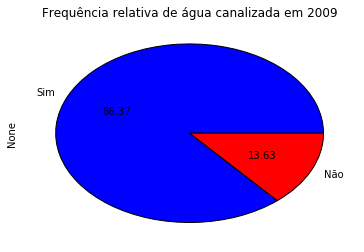

In [409]:
N09_V0211 = (Nordeste2009.V0211.value_counts()/n09*100).round(decimals = 2)
N09_V0211.plot(kind='pie', colors=('blue', 'red'),title = 'Frequência relativa de água canalizada em 2009' ,autopct="%0.2f")

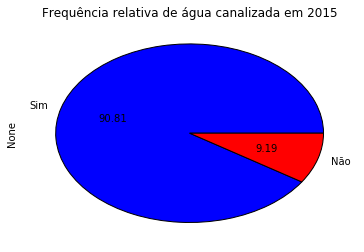

In [410]:
N15_V0211 = (Nordeste2015.V0211.value_counts()/n15*100).round(decimals=2)
N15_V0211.plot(kind='pie', colors=('blue', 'red'),title = 'Frequência relativa de água canalizada em 2015' ,autopct="%0.2f")

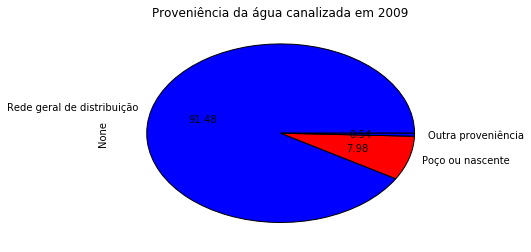

In [411]:
N09_V0212 =(Nordeste2009.V0212.value_counts()/n09*100).round(decimals = 2)
N09_V0212.plot(kind='pie', colors=('blue', 'red'),title = 'Proveniência da água canalizada em 2009' ,autopct="%0.2f")

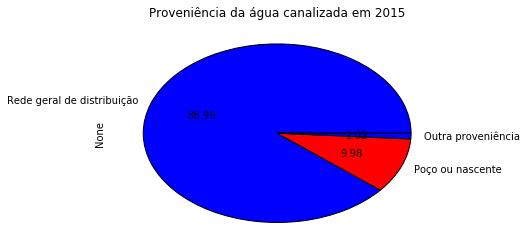

In [412]:
N15_V0212 =(Nordeste2015.V0212.value_counts()/n15*100).round(decimals = 2)
N15_V0212.plot(kind='pie', colors=('blue', 'red'),title = 'Proveniência da água canalizada em 2015' ,autopct="%0.2f")

In [413]:
print('Forma de escoadouro do banheiro ou sanitário em 2009: ')
N09_V0217 = (Nordeste2009.V0217.value_counts()/n09*100).round(decimals=1)
N09_V0217

Forma de escoadouro do banheiro ou sanitário em 2009: 


Rede coletora de esgoto ou pluvial    29.4
Fossa rudimentar                      25.6
Fossa séptica não ligada              12.1
Fossa séptica ligada a rede            2.7
Vala                                   1.9
Direto para o rio, lago ou mar         1.2
Outra forma                            0.1
dtype: float64

In [414]:
print('Forma de escoadouro do banheiro ou sanitário em 2015: ')
N15_V0217 = (Nordeste2015.V0217.value_counts()/n15*100).round(decimals=1)
N15_V0217

Forma de escoadouro do banheiro ou sanitário em 2015: 


Rede coletora de esgoto ou pluvial    31.8
Fossa rudimentar                      18.5
Fossa séptica não ligada              15.2
Fossa séptica ligada a rede            3.8
Vala                                   1.6
Direto para o rio, lago ou mar         0.8
Outra forma                            0.1
dtype: float64

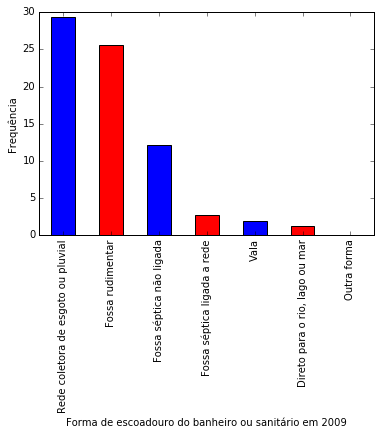

In [415]:
N09_V0217.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.ylabel('Frequência')
plt.xlabel('Forma de escoadouro do banheiro ou sanitário em 2009')

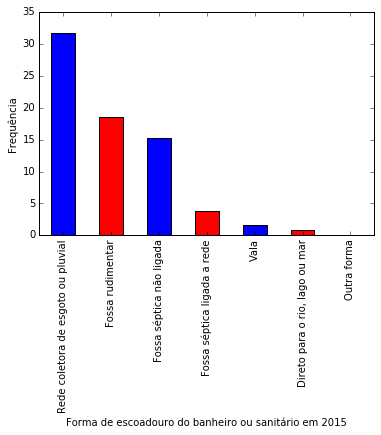

In [416]:
N15_V0217.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.ylabel('Frequência')
plt.xlabel('Forma de escoadouro do banheiro ou sanitário em 2015')

In [417]:
print('2009')
C09_V0211_V0217 = pd.crosstab(Nordeste2009.V0211, Nordeste2009.V0217, rownames=['Água canalizada'], colnames=['Forma de escoadouro'], margins=True)
C09_V0211_V0217

2009


Forma de escoadouro,Rede coletora de esgoto ou pluvial,Fossa séptica ligada a rede,Fossa séptica não ligada,Fossa rudimentar,Vala,"Direto para o rio, lago ou mar",Outra forma,All
Água canalizada,,,,,,,,
Sim,13383,1236,5159,9906,533,523,35,31471
Não,216,18,431,1932,323,36,10,4965
All,13599,1254,5590,11838,856,559,45,46243


In [418]:
print('2015')
C15_V0211_V0217 = pd.crosstab(Nordeste2015.V0211, Nordeste2015.V0217, rownames=['Água canalizada'], colnames=['Forma de escoadouro'], margins=True)
C15_V0211_V0217

2015


Forma de escoadouro,Rede coletora de esgoto ou pluvial,Fossa séptica ligada a rede,Fossa séptica não ligada,Fossa rudimentar,Vala,"Direto para o rio, lago ou mar",Outra forma,All
Água canalizada,,,,,,,,
Sim,13702,1612,6142,6756,495,318,38,29584
Não,99,54,469,1266,184,21,17,2991
All,13801,1666,6611,8022,679,339,55,43434


In [419]:
print('Tabela com frequências relativas(2009): ')
R1 = (C09_V0211_V0217/len(Nordeste2009)*100).round(decimals=1)
R1

Tabela com frequências relativas(2009): 


,Rede coletora de esgoto ou pluvial,Fossa séptica ligada a rede,Fossa séptica não ligada,Fossa rudimentar,Vala,"Direto para o rio, lago ou mar",Outra forma,All
Água canalizada,,,,,,,,
Sim,28.9,2.7,11.2,21.4,1.2,1.1,0.1,68.1
Não,0.5,0.0,0.9,4.2,0.7,0.1,0.0,10.7
All,29.4,2.7,12.1,25.6,1.9,1.2,0.1,100.0


In [420]:
print('Tabela com frequências relativas(2015): ')
R2 = (C15_V0211_V0217/len(Nordeste2015)*100).round(decimals=1)
R2

Tabela com frequências relativas(2015): 


,Rede coletora de esgoto ou pluvial,Fossa séptica ligada a rede,Fossa séptica não ligada,Fossa rudimentar,Vala,"Direto para o rio, lago ou mar",Outra forma,All
Água canalizada,,,,,,,,
Sim,31.5,3.7,14.1,15.6,1.1,0.7,0.1,68.1
Não,0.2,0.1,1.1,2.9,0.4,0.0,0.0,6.9
All,31.8,3.8,15.2,18.5,1.6,0.8,0.1,100.0


In [421]:
print('Destino do lixo domiciliar em 2009:')
N09_V0218 = (Nordeste2009.V0218.value_counts()/n09*100).round(decimals=1)
N09_V0218

Destino do lixo domiciliar em 2009:


Coletado diretamente                      54.3
Queimado ou enterrado na propriedade      11.4
Coletado indiretamente                     9.8
Jogado em terreno baldio ou logradouro     3.2
Jogado em rio, lago ou mar                 0.1
Outra destino                              0.0
dtype: float64

In [422]:
print('Destino do lixo domiciliar em 2015:')
N15_V0218 = (Nordeste2015.V0218.value_counts()/n15*100).round(decimals=1)
N15_V0218


Destino do lixo domiciliar em 2015:


Coletado diretamente                      53.4
Queimado ou enterrado na propriedade      11.3
Coletado indiretamente                     8.9
Jogado em terreno baldio ou logradouro     1.3
Outra destino                              0.0
Jogado em rio, lago ou mar                 0.0
dtype: float64

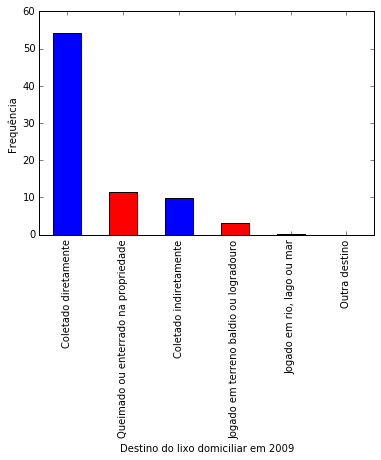

In [423]:
N09_V0218.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.ylabel('Frequência')
plt.xlabel('Destino do lixo domiciliar em 2009')

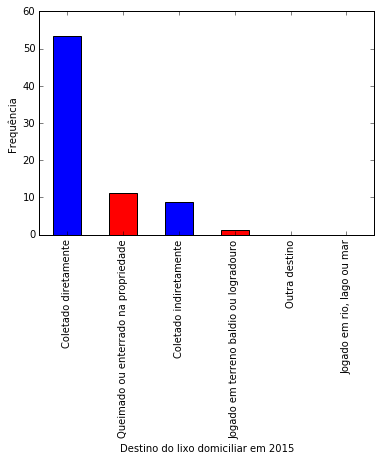

In [424]:
N15_V0218.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.ylabel('Frequência')
plt.xlabel('Destino do lixo domiciliar em 2015')

Com a análise feita do saneamento básico, a mudança foi pequena. Os parametros estudados não mudaram consideravelmente.

## <font color='red'>Análise da tecnologia nos domicílios do Nordeste</font>

In [425]:
print('Forma de iluminação em 2009:')
N09_V0219 = (Nordeste2009.V0219.value_counts()/n09*100).round(decimals = 2)
N09_V0219

Forma de iluminação em 2009:


Elétrica                  77.40
Óleo, querosene ou gás     1.19
Outra forma                0.20
dtype: float64

In [426]:
print('Forma de iluminação em 2015:')
N15_V0219 = (Nordeste2015.V0219.value_counts()/n09*100).round(decimals = 2)
N15_V0219

Forma de iluminação em 2015:


Elétrica                  70.19
Óleo, querosene ou gás     0.16
Outra forma                0.10
dtype: float64

In [427]:
#Separei apenas os domicílios com microcomputador no Nordeste em 2009
Nordeste2009_micro = Nordeste2009[Nordeste2009.V0231 == 'Sim']
Nordeste2009_micro.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V2136,V2033,V2034,V2035,V2036,V2037,V2038,V2039,V2041,V9992
18334,18334,2009,21,18,2,1,5,5,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
18337,18337,2009,21,18,5,1,6,6,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
18338,18338,2009,21,18,6,1,6,5,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
18360,18360,2009,21,26,7,1,4,3,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710
18363,18363,2009,21,26,10,1,2,2,1,2,...,NaN,3,3,1,3,3,3,3,3,20120710


In [428]:
#n_m indica o número de domicílios com microcomputador no Nordeste em 2009
n_m = Nordeste2009_micro.shape[0]

In [429]:
print('Frequência dos domicílios com microcomputador em 2009:')
N09_V0231 = (Nordeste2009.V0231.value_counts()/n09*100).round(decimals = 2)
N09_V0231

Frequência dos domicílios com microcomputador em 2009:


Não    61.64
Sim    17.16
dtype: float64

In [430]:
print('Frequência dos domicílios que tem computador e acessam a internet em 2009:')
N09_V0232 = (Nordeste2009_micro.V0232.value_counts()/n_m*100).round(decimals = 2)
N09_V0232

Frequência dos domicílios que tem computador e acessam a internet em 2009:


Sim    79.43
Não    20.57
dtype: float64

In [431]:
print('Frequência dos domicílios com microcomputador em 2015:')
N15_V0231 = (Nordeste2015.V0231.value_counts()/n15*100).round(decimals = 2)
N15_V0231

Frequência dos domicílios com microcomputador em 2015:


Não    49.77
Sim    25.23
dtype: float64

In [432]:
print('Frequência dos domicílios que acessam a internet em 2015: ')
N15_V02322 = (Nordeste2015.V02322.value_counts()/n15*100).round(decimals = 2)
N15_V02322

Frequência dos domicílios que acessam a internet em 2015: 


Não    38.06
Sim    36.94
dtype: float64

Em questão de energia, todos os parâmetros diminuiram, devido a domicilios que tem como resposta "Não aplicavel". Já na internet, fica claro que o acesso à internet aumentou, isto porque em 2009, 17% dos domicílios tinham microcomputador e desses 17%, 80% acessavam a internet. Já em 2015, 37% dos domicilios tinham internet (tendo ou não microcomputador) e 25% tinham microcomputador.

## <font color='red'>Análise de renda nos domicílios do Nordeste</font>

In [433]:
print('Rendimento médio mensal em 2009: ')
int(Nordeste2009.V4621.mean())

Rendimento médio mensal em 2009: 


540

In [434]:
print('Rendimento médio mensal em 2015 ')
int(Nordeste2015.V4621.mean())

Rendimento médio mensal em 2015 


850

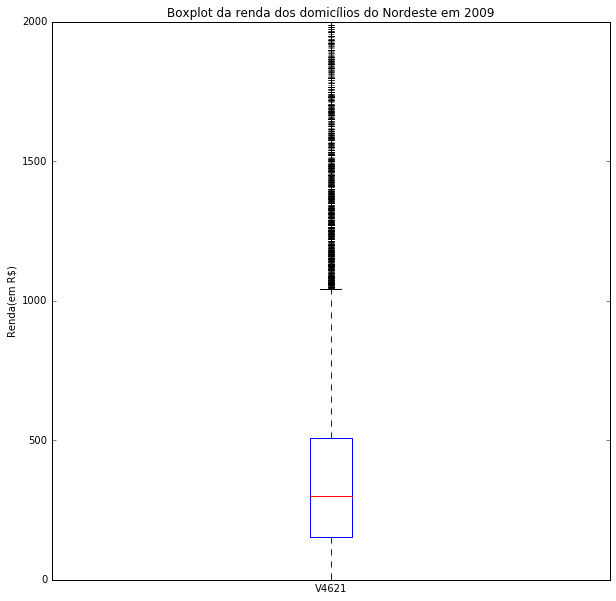

In [435]:
Nordeste2009.V4621.plot (kind='box', figsize=(10,10), title = 'Boxplot da renda dos domicílios do Nordeste em 2009')
plt.axis([0,2,0,2000])
plt.ylabel('Renda(em R$)')

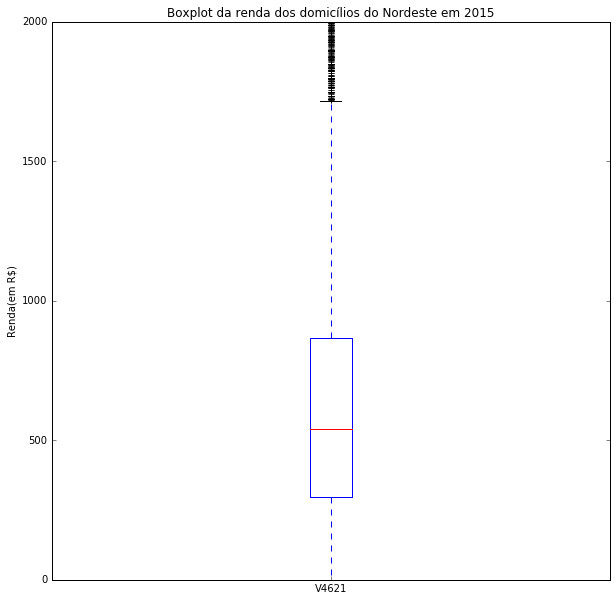

In [436]:
Nordeste2015.V4621.plot (kind='box', figsize=(10,10), title = 'Boxplot da renda dos domicílios do Nordeste em 2015')
plt.axis([0,2,0,2000])
plt.ylabel('Renda(em R$)')

In [437]:
faixa = arange(0, 2501 ,125)

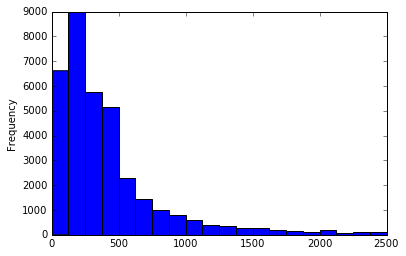

In [438]:
plot = Nordeste2009.V4621.plot.hist(bins =faixa)
plot

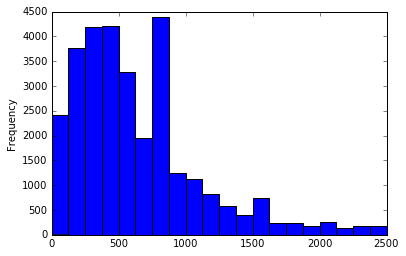

In [439]:
plot = Nordeste2015.V4621.plot.hist(bins =faixa)
plot

Fica claro que a renda melhorou entre os domicílios do Nordeste, tanto na média, como nos boxplot e histogramas feitos.

___
## Conclusão 

A partir dos dados análisados, nota-se que a vida no Nordeste melhorou ligeiramente. Em saneamento básico não houve uma melhora expressiva, mas a renda melhorou bastante analisando tanto o boxplot como a simetría do histograma. O que pode-se concluir é que muita gente ainda vide em péssimas condições mas houve uma pequena evolução nesse tempo.